<a href="https://colab.research.google.com/github/GOVINDKS14/Machine-Learning_Basics/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [118]:
X = 6 * np.random.rand(200,1)-3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

# y = 0.8x^2 + 0.9x + 2

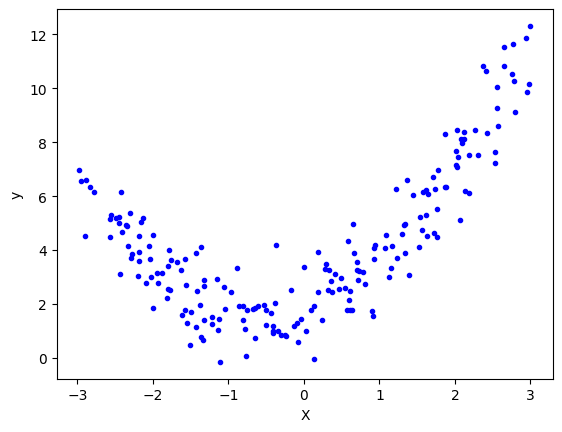

In [119]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [120]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [121]:
# Applying linear regression
lr = LinearRegression()

In [122]:
lr.fit(X_train,y_train)

LinearRegression()

In [123]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.35489689598961094

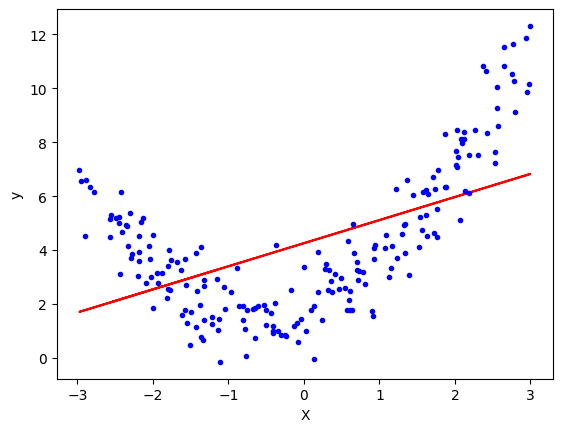

In [124]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,"b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [125]:
# Applying Polynomial Linear Regression
# degree = 2
poly = PolynomialFeatures(degree=2)

X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.transform(X_test)

In [126]:
print(X_train[0])
print(X_train_transform[0])

[-2.5503585]
[ 1.         -2.5503585   6.50432849]


In [127]:
# include_bias parameter

In [128]:
lr = LinearRegression()
lr.fit(X_train_transform,y_train)

LinearRegression()

In [129]:
y_pred = lr.predict(X_test_transform)

In [130]:
r2_score(y_test,y_pred)

0.878130084365917

In [131]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.85035947 0.83072392]]
[1.92039608]


In [132]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

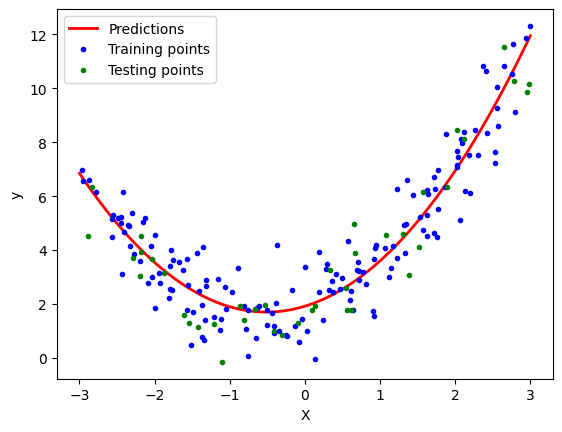

In [133]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,y_train,"b.",label='Training points')
plt.plot(X_test,y_test,"g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [134]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

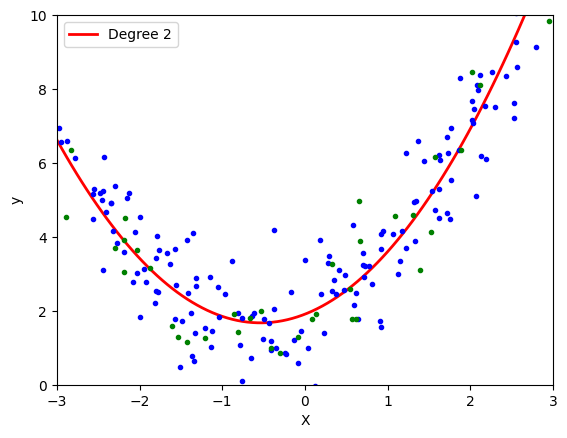

In [135]:
polynomial_regression(2)

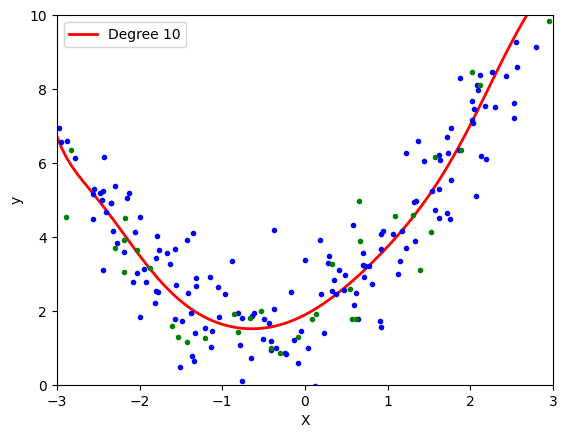

In [136]:
polynomial_regression(10)

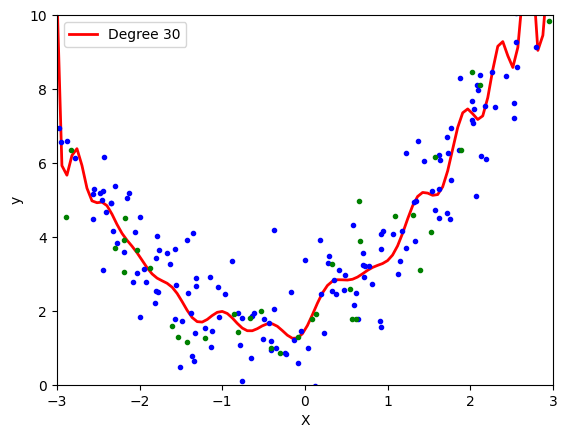

In [137]:
polynomial_regression(30)

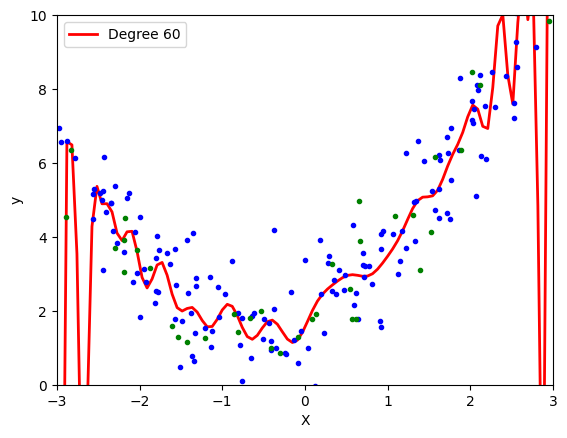

In [138]:
polynomial_regression(60)